# DS-SF-30 | Codealong 09: Linear Regression, Part 3

In [59]:
import os

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import linear_model

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

## Part A - Model Fit and Customer Retention

In [60]:
from functools import reduce

retentions = np.array([1.000, 0.869, 0.742, 0.653, 0.593, 0.551, 0.517, 0.491])

In [61]:
deltas = range(len(retentions))
last = 1
for index in range(len(retentions)):
    deltas[index] = retentions[index] / last
    last = retentions[index]
    
deltas

[1.0,
 0.86899999999999999,
 0.85385500575373996,
 0.88005390835579522,
 0.90811638591117905,
 0.9291736930860035,
 0.9382940108892921,
 0.94970986460348161]

In [62]:
df = pd.DataFrame({'year': range(len(retentions)), 'score': retentions, 'delta': deltas})
df

,delta,score,year
0,1.000000,1.000,0
1,0.869000,0.869,1
2,0.853855,0.742,2
3,0.880054,0.653,3
4,0.908116,0.593,4
5,0.929174,0.551,5
6,0.938294,0.517,6
7,0.949710,0.491,7


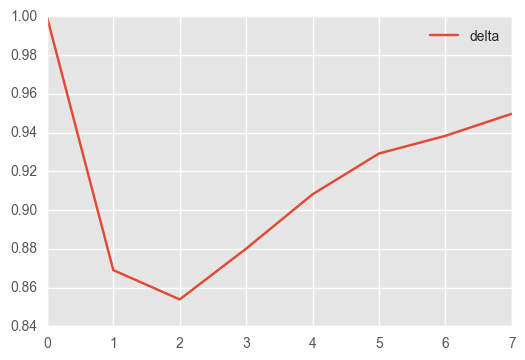

In [63]:
df[ ['delta' ] ].plot()

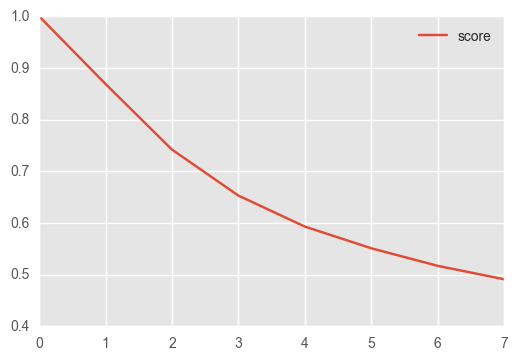

In [64]:
df[ ['score' ] ].plot()

In [65]:
import math

df['delta_sqrt'] = df[ 'delta' ].map(lambda x: math.sqrt(x))
df['year_log'] = df[ 'delta' ].map(lambda x: np.log(x))
df

,delta,score,year,delta_sqrt,year_log
0,1.000000,1.000,0,1.000000,0.000000
1,0.869000,0.869,1,0.932202,-0.140412
2,0.853855,0.742,2,0.924043,-0.157994
3,0.880054,0.653,3,0.938112,-0.127772
4,0.908116,0.593,4,0.952951,-0.096383
5,0.929174,0.551,5,0.963937,-0.073460
6,0.938294,0.517,6,0.968656,-0.063692
7,0.949710,0.491,7,0.974531,-0.051599


In [66]:
df['delta_sqrt_inv'] = df.apply(lambda row: 1 / row['delta_sqrt'], axis=1)
df

,delta,score,year,delta_sqrt,year_log,delta_sqrt_inv
0,1.000000,1.000,0,1.000000,0.000000,1.000000
1,0.869000,0.869,1,0.932202,-0.140412,1.072729
2,0.853855,0.742,2,0.924043,-0.157994,1.082201
3,0.880054,0.653,3,0.938112,-0.127772,1.065971
4,0.908116,0.593,4,0.952951,-0.096383,1.049371
5,0.929174,0.551,5,0.963937,-0.073460,1.037413
6,0.938294,0.517,6,0.968656,-0.063692,1.032358
7,0.949710,0.491,7,0.974531,-0.051599,1.026135


In [67]:
df['year_sqrt'] = df[ 'year' ].map(lambda yr: math.sqrt(yr))

In [77]:
model = smf.ols(formula = 'score ~ year_sqrt', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     326.9
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           1.84e-06
Time:                        20:11:55   Log-Likelihood:                 18.924
No. Observations:                   8   AIC:                            -33.85
Df Residuals:                       6   BIC:                            -33.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.0243      0.021     48.018      0.000         0.972     1.076
year_sqrt     -0.2061      0.011    -18.080      0.000        -0.234    -0.178
==============================================================================
Omnibus:                        5.681   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                1.824
Skew:                           1.152   Prob(JB):                        0.402
Kurtosis:                       3.405   Cond. No.                         5.34
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
model.predict()

array([ 1.02429456,  0.81814792,  0.73275918,  0.6672381 ,  0.61200128,
        0.56333666,  0.51934048,  0.47888182])

## Part B - One-Hot Encoding for Categorical Variables and SF Housing

In [107]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-09-zillow.csv'), index_col = 'ID')

In [108]:
df.drop(df[df.IsAStudio == 1].index, inplace = True)

In [109]:
smf.ols(formula = 'SalePrice ~ Baths', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     146.6
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           1.94e-31
Time:                        20:50:41   Log-Likelihood:                -1690.7
No. Observations:                 929   AIC:                             3385.
Df Residuals:                     927   BIC:                             3395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3401      0.099      3.434      0.001         0.146     0.535
Baths          0.5242      0.043     12.109      0.000         0.439     0.609
==============================================================================
Omnibus:                     1692.623   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2167434.305
Skew:                          12.317   Prob(JB):                         0.00
Kurtosis:                     238.345   Cond. No.                         5.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### What's the bathrooms' distribution in the dataset?

In [110]:
# TODO

> ### Let's keep properties with 1, 2, 3, or 4 bathrooms

In [111]:
df = df[df.Baths.isin([1, 2, 3, 4])]

> ### Let's use `pandas`'s `get_dummies` to create a one-hot encoding of the `Bath` categorical feature

In [112]:
baths_df = pd.get_dummies(df.Baths, prefix = 'Bath')

In [113]:
baths_df

,Bath_1.0,Bath_2.0,Bath_3.0,Bath_4.0
ID,,,,
15063505,0,1,0,0
15064044,1,0,0,0
15064257,0,1,0,0
15064295,0,1,0,0
15064391,1,0,0,0
15064536,0,1,0,0
15064669,0,0,1,0
15065032,1,0,0,0
15065140,1,0,0,0


In [114]:
baths_df.rename(columns = {'Bath_1.0': 'Bath_1',
                           'Bath_2.0': 'Bath_2',
                           'Bath_3.0': 'Bath_3',
                           'Bath_4.0': 'Bath_4'}, inplace = True)

In [115]:
baths_df

,Bath_1,Bath_2,Bath_3,Bath_4
ID,,,,
15063505,0,1,0,0
15064044,1,0,0,0
15064257,0,1,0,0
15064295,0,1,0,0
15064391,1,0,0,0
15064536,0,1,0,0
15064669,0,0,1,0
15065032,1,0,0,0
15065140,1,0,0,0


In [116]:
df = df.join([baths_df])

In [117]:
df.columns

Index([u'Address', u'DateOfSale', u'SalePrice', u'IsAStudio', u'Beds',
       u'Baths', u'Size', u'LotSize', u'BuiltInYear', u'Bath_1', u'Bath_2',
       u'Bath_3', u'Bath_4'],
      dtype='object')

### Activity | Linear modeling using `Bath`'s one-hot encoding

> ### `SalesPrice` as a function of `Bath_2`, `Bath_3`, and `Bath_4`

In [119]:
smf.ols(formula = 'SalePrice ~ Bath_2 + Bath_3 + Bath_4', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     11.78
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           1.49e-07
Time:                        20:51:26   Log-Likelihood:                -1314.2
No. Observations:                 794   AIC:                             2636.
Df Residuals:                     790   BIC:                             2655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9914      0.070     14.249      0.000         0.855     1.128
Bath_2         0.2831      0.099      2.855      0.004         0.088     0.478
Bath_3         0.4808      0.142      3.383      0.001         0.202     0.760
Bath_4         1.2120      0.232      5.231      0.000         0.757     1.667
==============================================================================
Omnibus:                     1817.972   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8069883.811
Skew:                          19.917   Prob(JB):                         0.00
Kurtosis:                     495.280   Cond. No.                         5.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### `SalesPrice` as a function of `Bath_1`, `Bath_3`, and `Bath_4`

In [120]:
smf.ols(formula = 'SalePrice ~ Bath_1 + Bath_3 + Bath_4', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     11.78
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           1.49e-07
Time:                        20:51:35   Log-Likelihood:                -1314.2
No. Observations:                 794   AIC:                             2636.
Df Residuals:                     790   BIC:                             2655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.2745      0.071     18.040      0.000         1.136     1.413
Bath_1        -0.2831      0.099     -2.855      0.004        -0.478    -0.088
Bath_3         0.1977      0.143      1.386      0.166        -0.082     0.478
Bath_4         0.9290      0.232      4.003      0.000         0.473     1.384
==============================================================================
Omnibus:                     1817.972   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8069883.811
Skew:                          19.917   Prob(JB):                         0.00
Kurtosis:                     495.280   Cond. No.                         5.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_4`

In [121]:
smf.ols(formula = 'SalePrice ~ Bath_1 + Bath_2 + Bath_4', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     11.78
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           1.49e-07
Time:                        20:51:46   Log-Likelihood:                -1314.2
No. Observations:                 794   AIC:                             2636.
Df Residuals:                     790   BIC:                             2655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.4722      0.124     11.881      0.000         1.229     1.715
Bath_1        -0.4808      0.142     -3.383      0.001        -0.760    -0.202
Bath_2        -0.1977      0.143     -1.386      0.166        -0.478     0.082
Bath_4         0.7313      0.253      2.886      0.004         0.234     1.229
==============================================================================
Omnibus:                     1817.972   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8069883.811
Skew:                          19.917   Prob(JB):                         0.00
Kurtosis:                     495.280   Cond. No.                         7.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> ### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_3`

In [122]:
smf.ols(formula = 'SalePrice ~ Bath_1 + Bath_2 + Bath_3', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     11.78
Date:                Thu, 12 Jan 2017   Prob (F-statistic):           1.49e-07
Time:                        20:51:55   Log-Likelihood:                -1314.2
No. Observations:                 794   AIC:                             2636.
Df Residuals:                     790   BIC:                             2655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.2035      0.221      9.969      0.000         1.770     2.637
Bath_1        -1.2120      0.232     -5.231      0.000        -1.667    -0.757
Bath_2        -0.9290      0.232     -4.003      0.000        -1.384    -0.473
Bath_3        -0.7313      0.253     -2.886      0.004        -1.229    -0.234
==============================================================================
Omnibus:                     1817.972   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8069883.811
Skew:                          19.917   Prob(JB):                         0.00
Kurtosis:                     495.280   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Part C - The Adverstising Dataset

In [ ]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-09-advertising.csv'))

In [ ]:
df

### Plots

> ### Sales ~ TV

In [ ]:
sns.lmplot(x = 'TV', y = 'Sales', data = df)

> ### Sales ~ Radio

In [ ]:
sns.lmplot(x = 'Radio', y = 'Sales', data = df)

> ### Sales ~ Newspaper

In [ ]:
sns.lmplot(x = 'Newspaper', y = 'Sales', data = df)

### Simple linear regressions

> ### Sales ~ TV

In [ ]:
model_tv = smf.ols(formula = 'Sales ~ TV', data = df).fit()

model_tv.summary()

> ### Sales ~ Radio

In [ ]:
model_radio = smf.ols(formula = 'Sales ~ Radio', data = df).fit()

model_radio.summary()

> ### Sales ~ Newspaper

In [ ]:
model_newspaper = smf.ols(formula = 'Sales ~ Newspaper', data = df).fit()

model_newspaper.summary()

### Residuals

> ### Sales ~ TV

In [ ]:
sm.qqplot(model_tv.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model_tv, 'TV')

pass

> ### Sales ~ Radio

In [ ]:
sm.qqplot(model_radio.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model_radio, 'Radio')

pass

> ### Sales ~ Newspaper

In [ ]:
sm.qqplot(model_newspaper.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model_newspaper, 'Newspaper')

pass

> ### Sales ~ TV + Radio + Newspaper

In [ ]:
# TODO

model.summary()

> ### Sales ~ TV + Radio

In [ ]:
# TODO

model.summary()

In [ ]:
sm.qqplot(model.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'TV')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'Radio')

pass

## Part D - Interaction Effects and Advertising

### Sales ~ TV + Radio + TV * Radio

In [ ]:
model = smf.ols(formula = 'Sales ~ TV + Radio + TV * Radio', data = df).fit()

model.summary()

In [ ]:
sm.qqplot(model.resid, line = 's')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'TV')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'Radio')

pass

In [ ]:
sm.graphics.plot_regress_exog(model, 'TV:Radio')

pass